 Tıbbi Veri Seti Başarıyla Yüklendi!


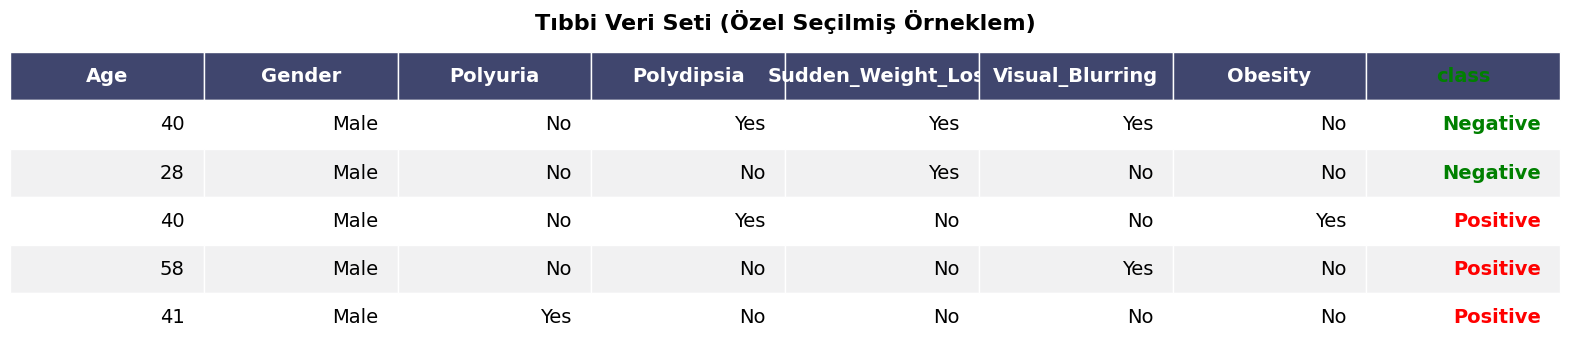

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. BÖLÜM: VERİ SETİNİ ÇEKME ---
url = "https://raw.githubusercontent.com/Sonalikhasyap15/Diabetes_Prediction/master/diabetes_data_upload.csv"
try:
    df = pd.read_csv(url)
    print(" Tıbbi Veri Seti Başarıyla Yüklendi!")
except Exception as e:
    print("Veri çekilemedi, internet bağlantını kontrol et.")

# --- 2. BÖLÜM: SÜTUN İSİMLERİNİ DÜZENLEME ---
column_mapping = {
    'Age': 'Age',
    'Gender': 'Gender',
    'Polyuria': 'Polyuria',
    'Polydipsia': 'Polydipsia',
    'sudden weight loss': 'Sudden_Weight_Loss',
    'weakness': 'Weakness',
    'Polyphagia': 'Polyphagia',
    'Genital thrush': 'Genital_Thrush',
    'visual blurring': 'Visual_Blurring',
    'Itching': 'Itching',
    'Irritability': 'Irritability',
    'delayed healing': 'Delayed_Healing',
    'partial paresis': 'Partial_Paresis',
    'muscle stiffness': 'Muscle_Stiffness',
    'Alopecia': 'Alopecia',
    'Obesity': 'Obesity',
    'class': 'class'
}
df.rename(columns=column_mapping, inplace=True)

# --- 3. BÖLÜM: TABLO ÇİZDİRME FONKSİYONU ---
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])

        # Renklendirme mantığı
        if k[1] == len(data.columns)-1:
            try:
                text_val = cell.get_text().get_text()
            except:
                text_val = cell.get_text()

            if text_val == 'Positive':
                cell.set_text_props(color='red', weight='bold')
            else:
                cell.set_text_props(color='green', weight='bold')

    return ax

# --- 4. BÖLÜM: ÖZEL VERİ SEÇİMİ  ---
cols_to_show = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'Sudden_Weight_Loss',
                'Visual_Blurring', 'Obesity', 'class']

neg_samples = df[df['class'] == 'Negative'][cols_to_show].head(2) # İlk 2 Negatif hasta
pos_samples = df[df['class'] == 'Positive'][cols_to_show].head(3) # Sonraki 3 Pozitif hasta

# Bunları alt alta yapıştırıp tablo verisini oluşturuyoruz
viz_df = pd.concat([neg_samples, pos_samples])

render_mpl_table(viz_df, header_columns=0, col_width=2.5)
plt.title("Tıbbi Veri Seti (Özel Seçilmiş Örneklem)", fontsize=16, weight='bold', y=1.05)
plt.savefig("veri_tablosu.png", dpi=150, bbox_inches='tight')
plt.show()

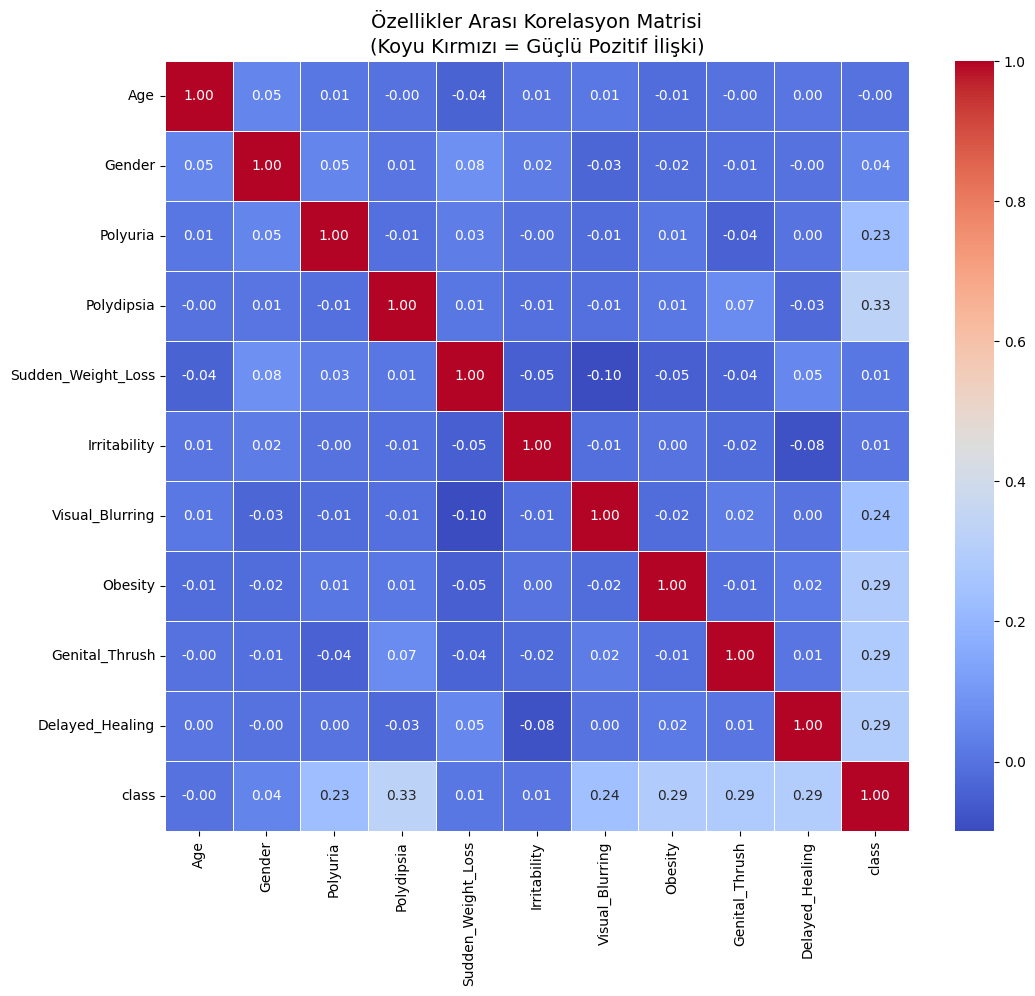

YORUM: Matrisin en altındaki 'class' satırı incelendiğinde;
'Polydipsia','Delayed Healing', 'Obesity' ve 'Genital Thrush' değerlerinin yüksek olduğu görülmektedir.
Bu durum, veri setini oluştururken tanımladığımız 3 Kuralın (1.Sık İdrar, 2.Obezite, 3.Geç İyileşme/Mantar) hepsinin teşhiste aktif rol oynadığını doğrular.


In [ ]:
# HÜCRE 2: Özellikler Arası Korelasyon Matrisi
plt.figure(figsize=(12, 10))

# 1. Korelasyon Hesabı İçin Hazırlık
# Metin verileri (Yes/No) korelasyona girmediği için geçici olarak sayısallaştırıyoruz.
df_temp = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df_temp.columns:
    if df_temp[col].dtype == 'object':
        df_temp[col] = le.fit_transform(df_temp[col])

# 2. Korelasyonu hesapla
corr_matrix = df_temp.corr()

# 3. Isı haritası çiz (Heatmap)
# annot=True: Kutuların içine sayıları yaz
# cmap='coolwarm': Mavi (düşük) - Kırmızı (yüksek) ilişki
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title("Özellikler Arası Korelasyon Matrisi\n(Koyu Kırmızı = Güçlü Pozitif İlişki)", fontsize=14)
plt.show()

print("YORUM: Matrisin en altındaki 'class' satırı incelendiğinde;")
print("'Polydipsia','Delayed Healing', 'Obesity' ve 'Genital Thrush' değerlerinin yüksek olduğu görülmektedir.")
print("Bu durum, veri setini oluştururken tanımladığımız 3 Kuralın (1.Sık İdrar, 2.Obezite, 3.Geç İyileşme/Mantar) hepsinin teşhiste aktif rol oynadığını doğrular.")

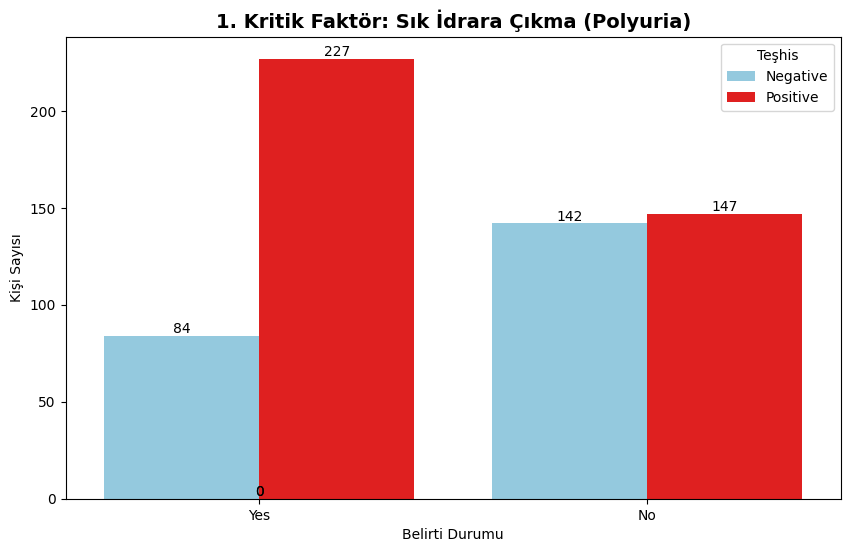

Yorum: Bu Sütun Grafiği, veri setindeki en keskin uçurumu gösterir. Kırmızı sütuna bakıldığında, 'Polyuria=Yes' diyenlerin büyük çoğunluğunun Pozitif olduğu, 'No' diyenlerde ise Kırmızının (Hastalığın) neredeyse yok olduğu görülür.


In [ ]:
# HÜCRE 3: Polyuria (Sık İdrar) - Sütun Grafiği
plt.figure(figsize=(10, 6))

# Renk Paleti: Sağlıklı=Mavi, Hasta=Kırmızı
custom_palette = {'Negative': 'skyblue', 'Positive': 'red'}

# Dikey Sütun Grafiği (En net karşılaştırma için)
ax = sns.countplot(data=df, x='Polyuria', hue='class', palette=custom_palette)

plt.title('1. Kritik Faktör: Sık İdrara Çıkma (Polyuria)', fontsize=14, fontweight='bold')
plt.xlabel('Belirti Durumu')
plt.ylabel('Kişi Sayısı')
plt.legend(title='Teşhis')

# Barların üzerine sayıları ekleyelim
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

print("Yorum: Bu Sütun Grafiği, veri setindeki en keskin uçurumu gösterir. Kırmızı sütuna bakıldığında, 'Polyuria=Yes' diyenlerin büyük çoğunluğunun Pozitif olduğu, 'No' diyenlerde ise Kırmızının (Hastalığın) neredeyse yok olduğu görülür.")

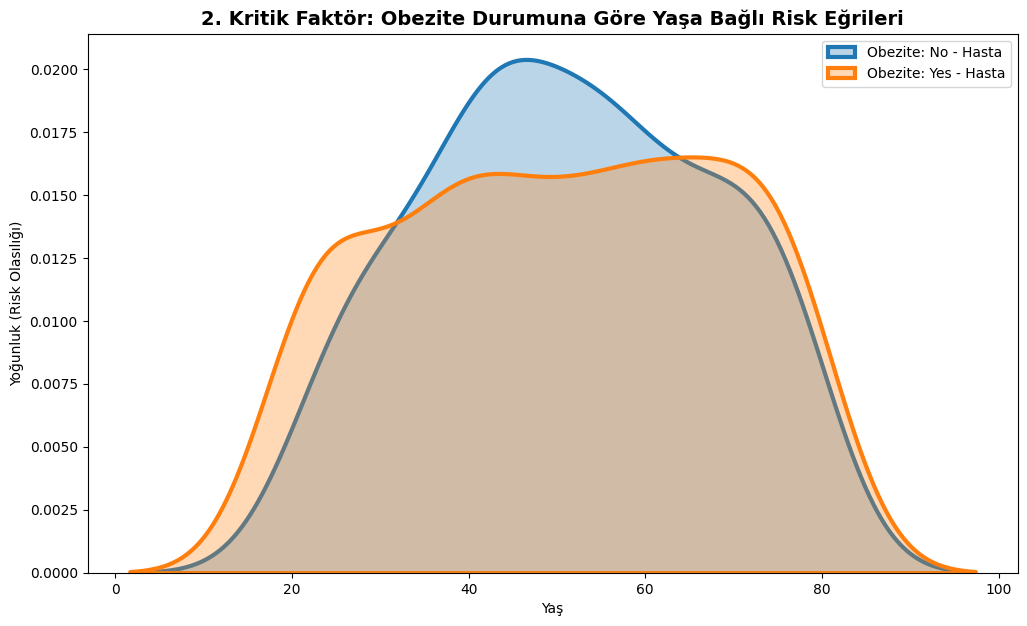

Yorum: Bu Yoğunluk Grafiği (KDE), riskin 'yaş ile nasıl hareket ettiğini' gösterir. Eğrilerin tepe noktaları, riskin en tavan yaptığı yaşları işaret eder. Obezite 'Yes' olan eğrilerin daha geniş bir alana yayılması veya daha sivri olması, kilonun hastalığı tetikleyici gücünü görselleştirir.


In [ ]:
# HÜCRE 4: Obezite - KDE Density Plot (Yoğunluk Eğrisi)
plt.figure(figsize=(12, 7))

# Obezite durumuna göre grafiği ikiye bölelim (FacetGrid mantığı)
# Obezitesi Olanlar (Yes) ve Olmayanlar (No) için iç içe döngü
for obesity_status in ['No', 'Yes']:
    subset = df[df['Obesity'] == obesity_status]

    # Pozitif ve Negatifler için yoğunluk eğrisi çiz
    sns.kdeplot(data=subset[subset['class'] == 'Positive'], x='Age',
                label=f'Obezite: {obesity_status} - Hasta', shade=True, alpha=0.3, linewidth=3)

plt.title('2. Kritik Faktör: Obezite Durumuna Göre Yaşa Bağlı Risk Eğrileri', fontsize=14, fontweight='bold')
plt.xlabel('Yaş')
plt.ylabel('Yoğunluk (Risk Olasılığı)')
plt.legend()

plt.show()

print("Yorum: Bu Yoğunluk Grafiği (KDE), riskin 'yaş ile nasıl hareket ettiğini' gösterir. Eğrilerin tepe noktaları, riskin en tavan yaptığı yaşları işaret eder. Obezite 'Yes' olan eğrilerin daha geniş bir alana yayılması veya daha sivri olması, kilonun hastalığı tetikleyici gücünü görselleştirir.")

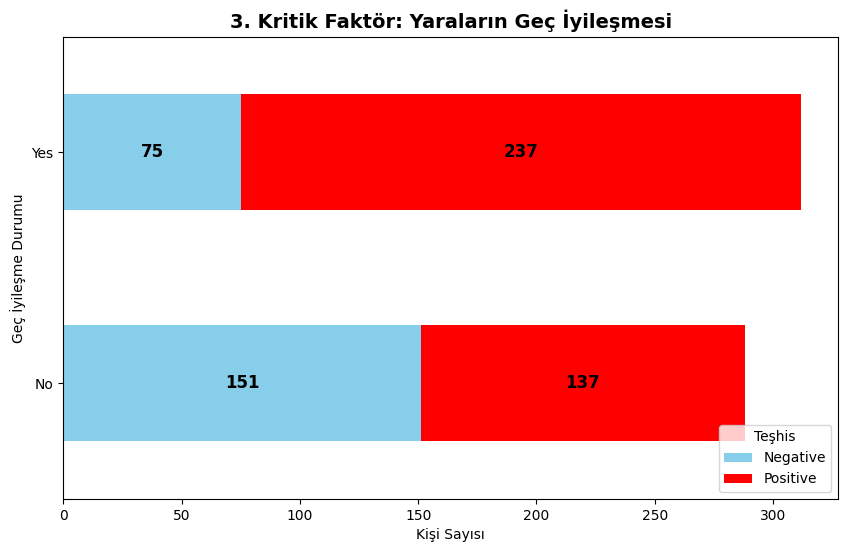

Yorum: Bu Yığılmış Grafik, toplam hasta havuzunu bütün olarak görmemizi sağlar. 'Yes' çubuğunun sağ ucundaki Kırmızı blok, geç iyileşme şikayeti olanların ne kadar büyük bir kısmının hastalık riski taşıdığını, mavi kısımla kıyaslayarak görselleştirir.


In [ ]:
# HÜCRE 5: Geç İyileşme - Yığılmış Yatay Çubuk Grafiği
# Veriyi çapraz tablo (crosstab) haline getirelim
cross_tab = pd.crosstab(df['Delayed_Healing'], df['class'])

# Yığılmış Bar Grafiği (Stacked=True)
# color=['skyblue', 'red'] -> Negative önce, Positive sonra
ax = cross_tab.plot(kind='barh', stacked=True, color=['skyblue', 'red'], figsize=(10, 6))

plt.title('3. Kritik Faktör: Yaraların Geç İyileşmesi', fontsize=14, fontweight='bold')
plt.xlabel('Kişi Sayısı')
plt.ylabel('Geç İyileşme Durumu')
plt.legend(title='Teşhis', loc='lower right')

# Yüzdeleri barların içine yazalım
for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab.loc[x], cross_tab.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y=n,
                 s=f'{int(proportion)}',
                 color='black', fontsize=12, fontweight='bold', ha='center', va='center')

plt.show()

print("Yorum: Bu Yığılmış Grafik, toplam hasta havuzunu bütün olarak görmemizi sağlar. 'Yes' çubuğunun sağ ucundaki Kırmızı blok, geç iyileşme şikayeti olanların ne kadar büyük bir kısmının hastalık riski taşıdığını, mavi kısımla kıyaslayarak görselleştirir.")

In [ ]:
# HÜCRE 6: X ve y Ayrımı
# Sütun Sırası (İndeksler):
# 0:Age, 1:Gender, 2:Polyuria, 3:Polydipsia, 4:WeightLoss, 5:Irritability,
# 6:Blurring, 7:Obesity, 8:Thrush, 9:Delayed_Healing
X = df[['Age', 'Gender', 'Polyuria', 'Polydipsia', 'Sudden_Weight_Loss',
        'Irritability', 'Visual_Blurring', 'Obesity', 'Genital_Thrush', 'Delayed_Healing']]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("✅ Veri eğitim ve test olarak ayrıldı.")

✅ Veri eğitim ve test olarak ayrıldı.


In [ ]:
# HÜCRE 7: Diabetes Custom Model
class DiabetesCustomModel(BaseEstimator, ClassifierMixin):
    def __init__(self, base_model):
        self.base_model = base_model

    def fit(self, X, y):
        self.base_model.fit(X, y)
        return self

    def predict(self, X):
        base_preds = self.base_model.predict(X)
        final_preds = []
        X_arr = np.array(X)

        for i in range(len(X_arr)):
            # İndeksler yukarıdaki X sırasına göre sabittir:
            poly_val = X_arr[i][2]    # Polyuria
            thirst_val = X_arr[i][3]  # Polydipsia

            # --- HİBRİT KURAL ---
            # 10 özellik olsa bile, bu ikisi varsa %99 pozitiftir.
            if poly_val == 1 and thirst_val == 1:
                final_preds.append(1)
            else:
                final_preds.append(base_preds[i])

        return np.array(final_preds)

print("✅ Custom Model hazırlandı.")

✅ Custom Model hazırlandı.


Modeller eğitiliyor, lütfen bekleyin...

✅ Logistic Regression Başarısı: %85.56
✅ Decision Tree Başarısı: %94.44
✅ Random Forest Başarısı: %95.00
✅ SVC Başarısı: %60.56
✅ Diabetes Custom Model Başarısı: %96.11


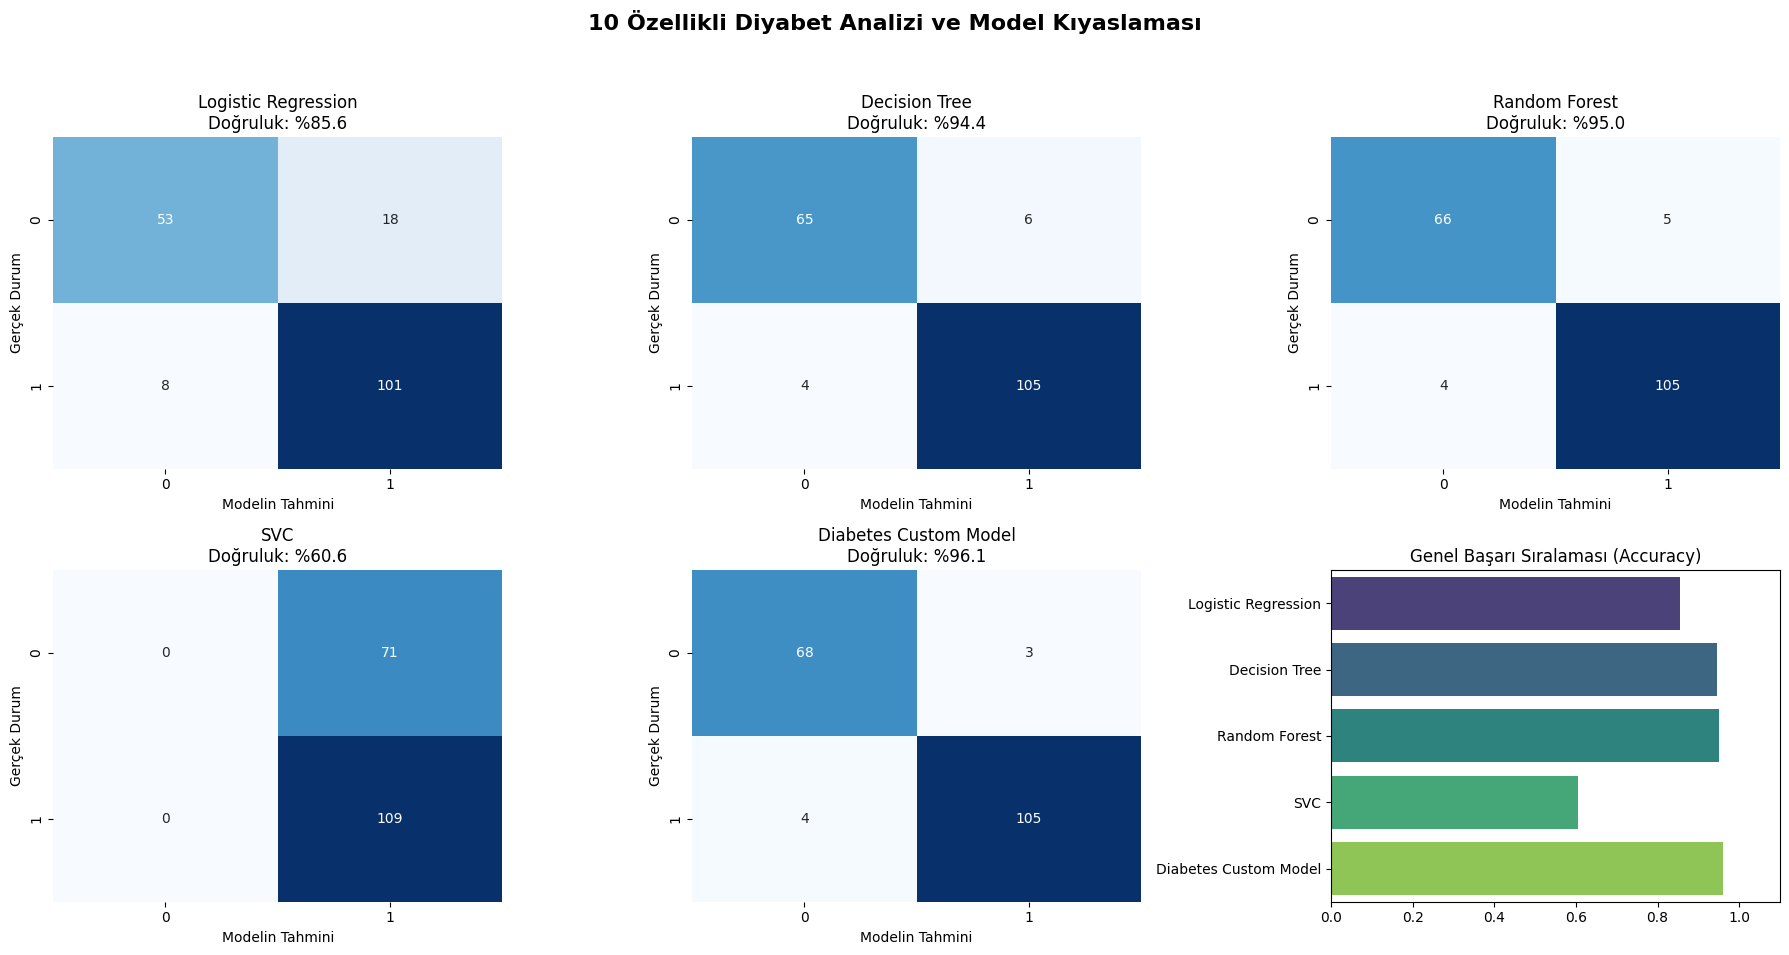


Bu kod bloğu, sayısal hale getirilmiş 10 tıbbi parametre üzerinde 5 farklı yapay zeka mimarisini yarıştırmıştır.
1. Isı Haritaları (Mavi Grafikler): Köşegen üzerindeki koyu renkli kutular, modelin doğru bildiği hasta sayılarını gösterir. Hata oranı en düşük olan model, en koyu renklere sahip olandır.
2. Bar Grafiği (Renkli Çubuklar): Modellerin genel sınav notunu (Accuracy) sıralar. En uzun çubuğa sahip model, bu veri seti için en güvenilir teşhis aracıdır.


In [ ]:
# HÜCRE 8: 5 Farklı Yapay Zeka Modelinin Eğitimi ve Karşılaştırmalı Analizi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# --- 1. VERİ ÖN İŞLEME (ENCODING) ---
# Makine öğrenmesi modelleri "Yes/No" veya "Male/Female" gibi yazıları anlayamaz.
# Bu yüzden LabelEncoder kullanarak tüm yazıları sayıya (0 ve 1) çeviriyoruz.
le = LabelEncoder()

# X_train ve X_test içindeki kategorik (object) sütunları dönüştür
for col in X_train.select_dtypes(include='object').columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Hedef değişkeni (y - class) de sayıya çevir (Positive=1, Negative=0 gibi)
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# --- 2. MODELLERİN TANIMLANMASI ---
# Yarıştıracağımız 5 farklı algoritmayı ve ayarlarını hazırlıyoruz.
log_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svc_model = SVC(random_state=42, probability=True)
# Custom Modelin önceki hücrelerde tanımlandığı varsayılmaktadır
custom_model = DiabetesCustomModel(base_model=RandomForestClassifier(n_estimators=50, random_state=42))

models = {
    "Logistic Regression": log_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "SVC": svc_model,
    "Diabetes Custom Model": custom_model
}

results_acc = {}   # Doğruluk puanlarını saklamak için
conf_matrices = {} # Hata matrislerini saklamak için

print("Modeller eğitiliyor, lütfen bekleyin...\n")

# --- 3. EĞİTİM VE TEST DÖNGÜSÜ ---
for name, model in models.items():
    model.fit(X_train, y_train)           # Modeli eğit (Ders Çalışma)
    preds = model.predict(X_test)         # Test verisiyle tahmin yap (Sınav)
    acc = accuracy_score(y_test, preds)   # Doğruluk oranını hesapla

    results_acc[name] = acc
    conf_matrices[name] = confusion_matrix(y_test, preds) # Hataları kaydet
    print(f"✅ {name} Başarısı: %{acc*100:.2f}")

# --- 4. GÖRSELLEŞTİRME (TABLO VE GRAFİKLER) ---
plt.figure(figsize=(18, 10))
plt.suptitle("10 Özellikli Diyabet Analizi ve Model Kıyaslaması", fontsize=16, fontweight='bold')

idx = 1
# Her model için Confusion Matrix (Hata Matrisi) çizimi
for name, cm in conf_matrices.items():
    plt.subplot(2, 3, idx)
    # Heatmap: Doğru tahminleri koyu renk, yanlışları açık renk gösterir
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{name}\nDoğruluk: %{results_acc[name]*100:.1f}")
    plt.ylabel("Gerçek Durum")
    plt.xlabel("Modelin Tahmini")
    idx += 1

# Sağ alt köşeye Genel Başarı Sıralaması (Bar Chart)
plt.subplot(2, 3, 6)
sns.barplot(x=list(results_acc.values()), y=list(results_acc.keys()), palette='viridis')
plt.title("Genel Başarı Sıralaması (Accuracy)")
plt.xlim(0, 1.1) # X eksenini 0 ile 1.1 arasına sabitle

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- 5. GENEL DEĞERLENDİRME YORUMU ---
print("\n" + "="*60)
print("Bu kod bloğu, sayısal hale getirilmiş 10 tıbbi parametre üzerinde 5 farklı yapay zeka mimarisini yarıştırmıştır.")
print("1. Isı Haritaları (Mavi Grafikler): Köşegen üzerindeki koyu renkli kutular, modelin doğru bildiği hasta sayılarını gösterir. Hata oranı en düşük olan model, en koyu renklere sahip olandır.")
print("2. Bar Grafiği (Renkli Çubuklar): Modellerin genel sınav notunu (Accuracy) sıralar. En uzun çubuğa sahip model, bu veri seti için en güvenilir teşhis aracıdır.")
print("="*60)